In [3]:
import yfinance as yf

In [4]:
from datetime import datetime
end = datetime.now()
start=datetime(end.year-10, end.month, end.day)


In [5]:
stock='HDB'
hdfc_data=yf.download(stock,start,end)

C:\Users\HP\AppData\Local\Temp\ipykernel_11028\4258177725.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  hdfc_data=yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed


In [6]:
hdfc_data.head()

Price,Close,High,Low,Open,Volume
Ticker,HDB,HDB,HDB,HDB,HDB
Date,,,,,
2015-07-14,29.419878,29.591090,29.281957,29.291469,633400
2015-07-15,29.476950,29.633895,29.386589,29.424635,1398400
2015-07-16,30.271181,30.313984,29.752790,29.752790,1651200
2015-07-17,30.375809,30.404345,30.071433,30.090457,1615800
2015-07-20,30.313982,30.494706,30.190328,30.333004,1553000


In [7]:
hdfc_data.shape

(2514, 5)

In [8]:
hdfc_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,HDB,HDB,HDB,HDB,HDB
count,2514.000000,2514.000000,2514.000000,2514.000000,2.514000e+03
mean,53.349707,53.805178,52.882991,53.354890,1.821402e+06
std,13.927883,14.029311,13.819359,13.929046,1.169930e+06
min,24.625948,24.920813,24.307304,24.602168,2.966000e+05
25%,44.969624,45.327541,44.500331,44.899810,1.107200e+06
50%,55.887775,56.242827,55.405372,55.827153,1.523150e+06
75%,64.387499,65.006413,63.847550,64.515208,2.152925e+06
max,81.654846,82.581079,80.952857,82.581079,1.581720e+07


In [9]:
hdfc_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2514 entries, 2015-07-14 to 2025-07-11
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, HDB)   2514 non-null   float64
 1   (High, HDB)    2514 non-null   float64
 2   (Low, HDB)     2514 non-null   float64
 3   (Open, HDB)    2514 non-null   float64
 4   (Volume, HDB)  2514 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 117.8 KB


In [10]:
hdfc_data.isna().sum()

Price   Ticker
Close   HDB       0
High    HDB       0
Low     HDB       0
Open    HDB       0
Volume  HDB       0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 1000x1200 with 0 Axes>

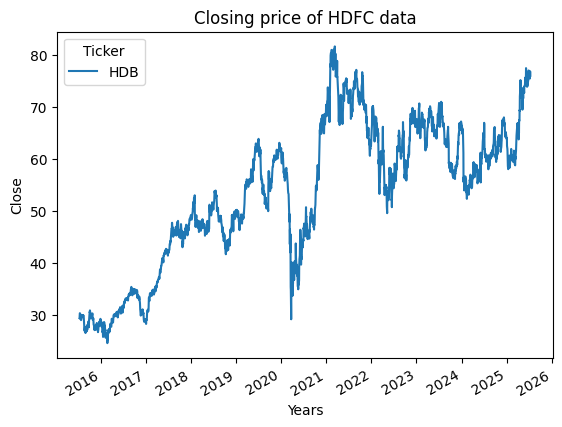

In [12]:
plt.figure(figsize=(10,12))
hdfc_data['Close'].plot()
plt.xlabel('Years')
plt.ylabel('Close')
plt.title('Closing price of HDFC data')
plt.show()

In [13]:
def plot_graph(figsize,values,column_name):
    plt.figure()
    values.plot(figsize=figsize)
    plt.xlabel('Years')
    plt.ylabel(column_name)
    plt.title(f"{column_name} of HDFC data")

In [14]:
hdfc_data.columns

MultiIndex([( 'Close', 'HDB'),
            (  'High', 'HDB'),
            (   'Low', 'HDB'),
            (  'Open', 'HDB'),
            ('Volume', 'HDB')],
           names=['Price', 'Ticker'])

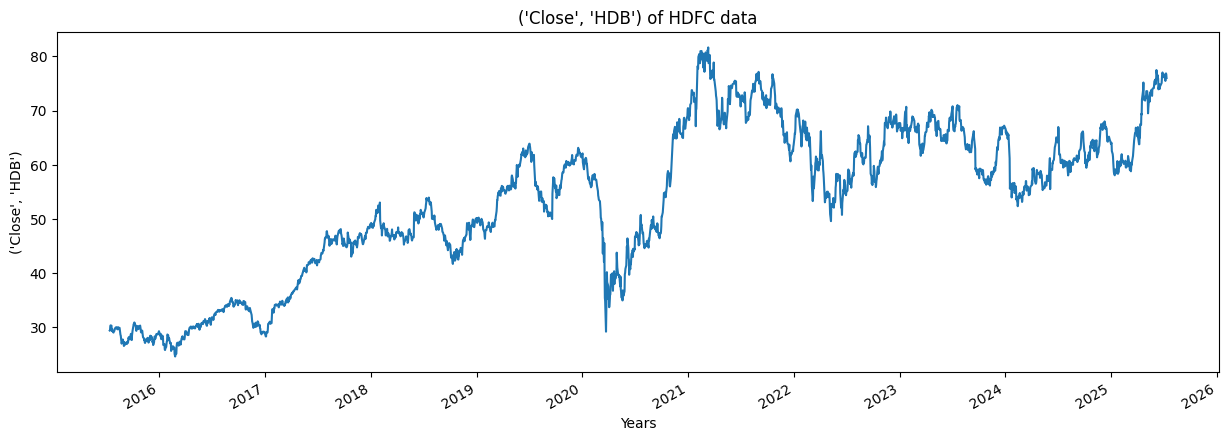

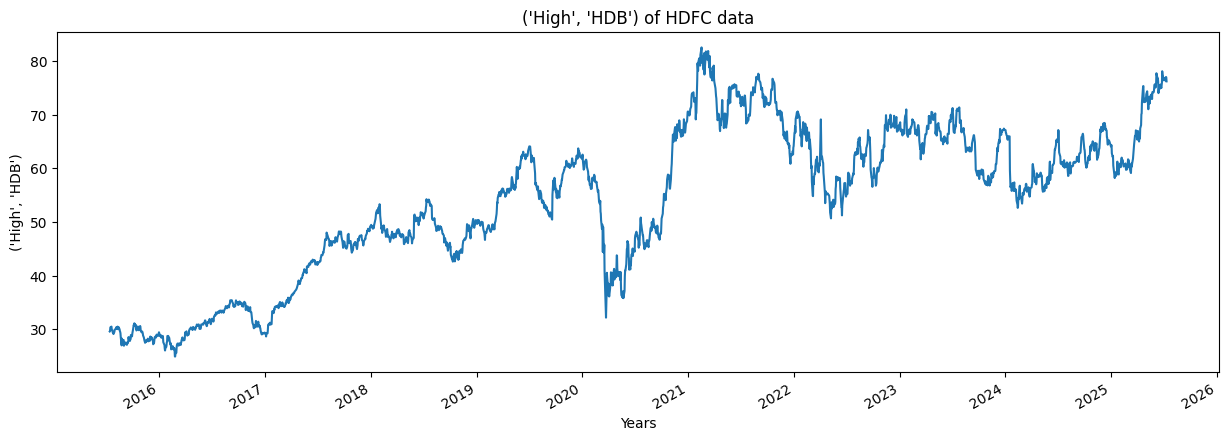

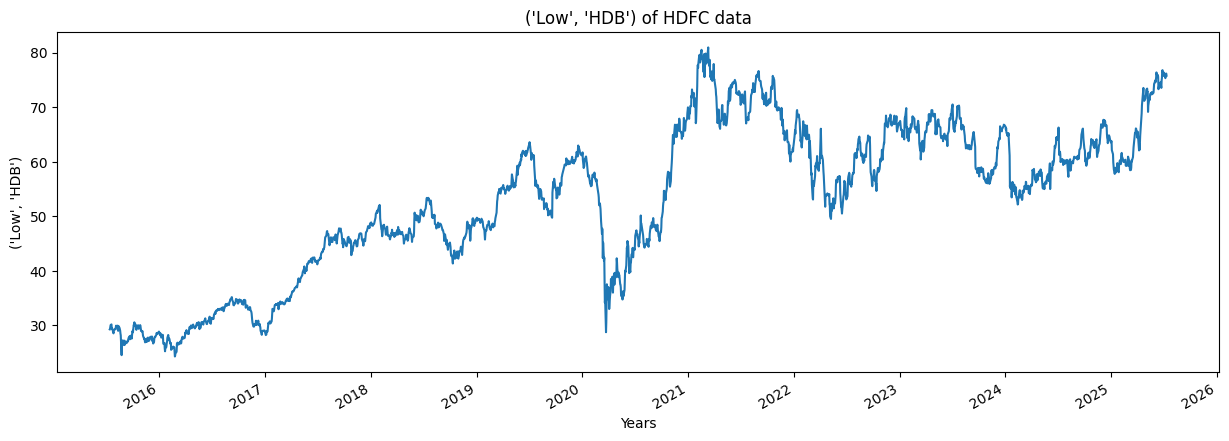

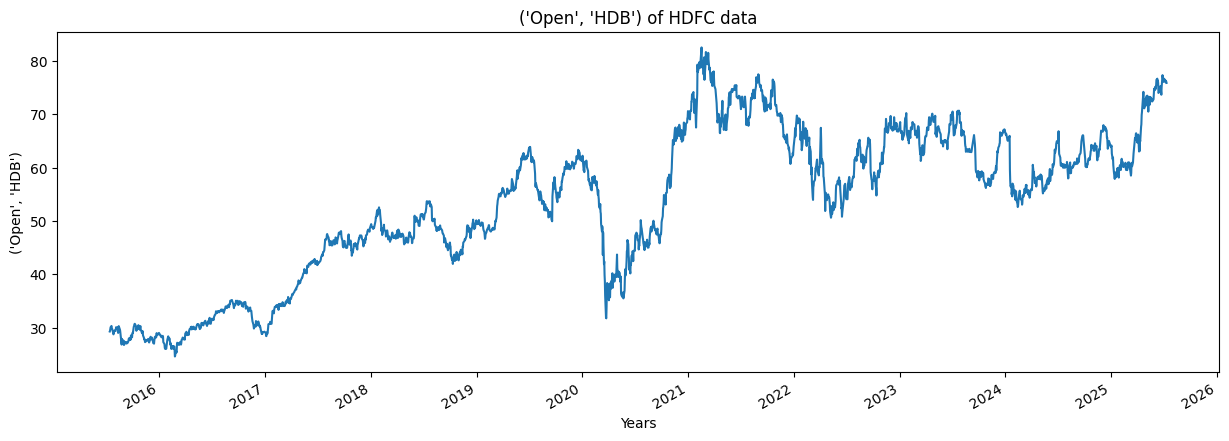

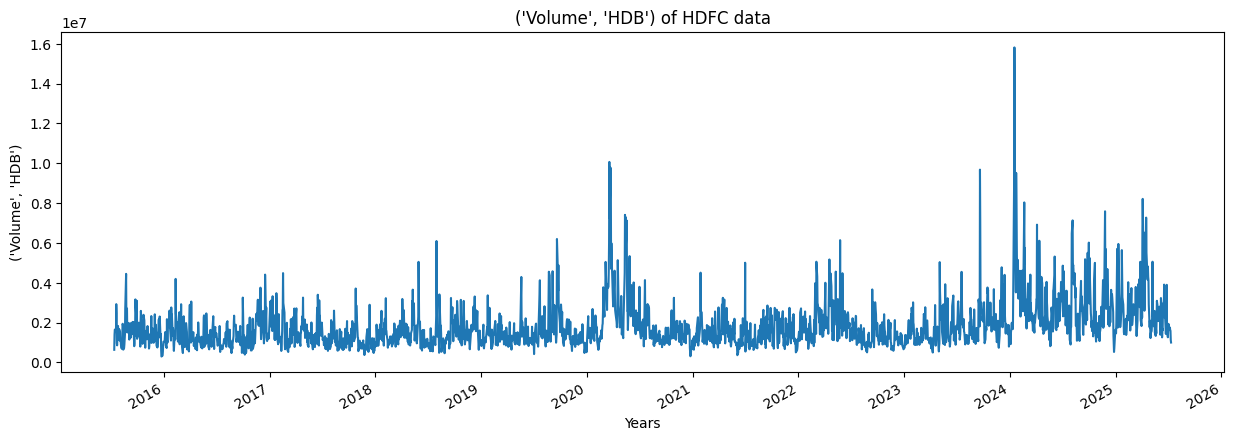

In [15]:
for column in hdfc_data.columns:
    plot_graph((15,5),hdfc_data[column],column)


In [16]:
import pandas as pd
data=pd.DataFrame([10,20,30,40,50,60,70,80,90,100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [17]:
data.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0
9,80.0


In [18]:
for i in range(2015,2026):
    print(i,list(hdfc_data.index.year).count(i))


2015 120
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252
2025 130


In [19]:
hdfc_data['MA_for_250_days']=hdfc_data['Close'].rolling(250).mean()

In [20]:
hdfc_data['MA_for_250_days'][0:250].tail()

Date
2016-07-01          NaN
2016-07-05          NaN
2016-07-06          NaN
2016-07-07          NaN
2016-07-08    28.804603
Name: MA_for_250_days, dtype: float64

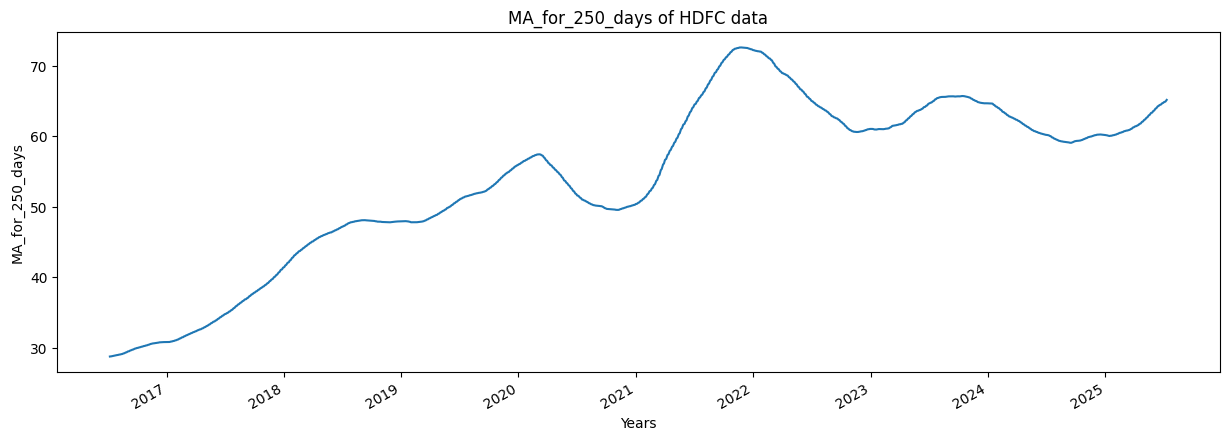

In [21]:
plot_graph((15,5),hdfc_data['MA_for_250_days'],'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

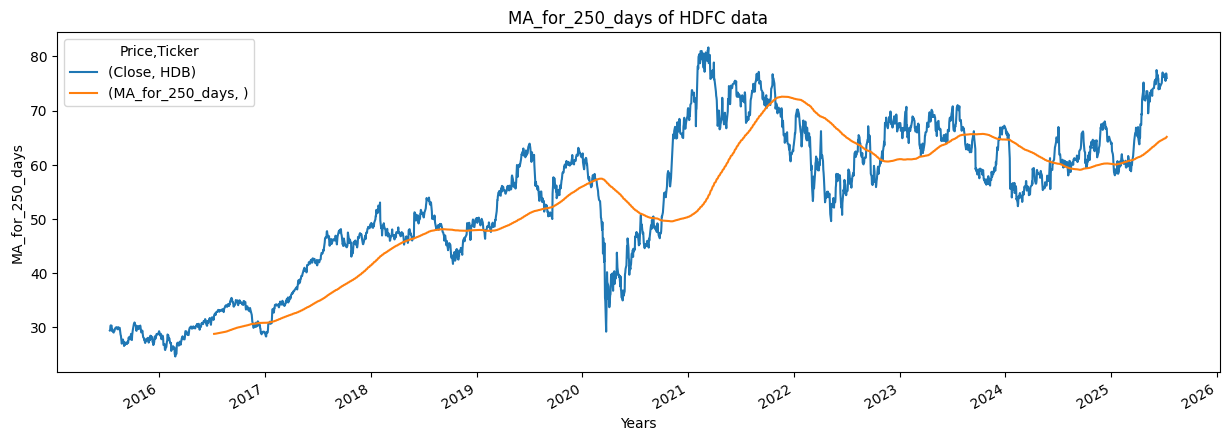

In [22]:
plot_graph((15,5),hdfc_data[['Close','MA_for_250_days']],'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

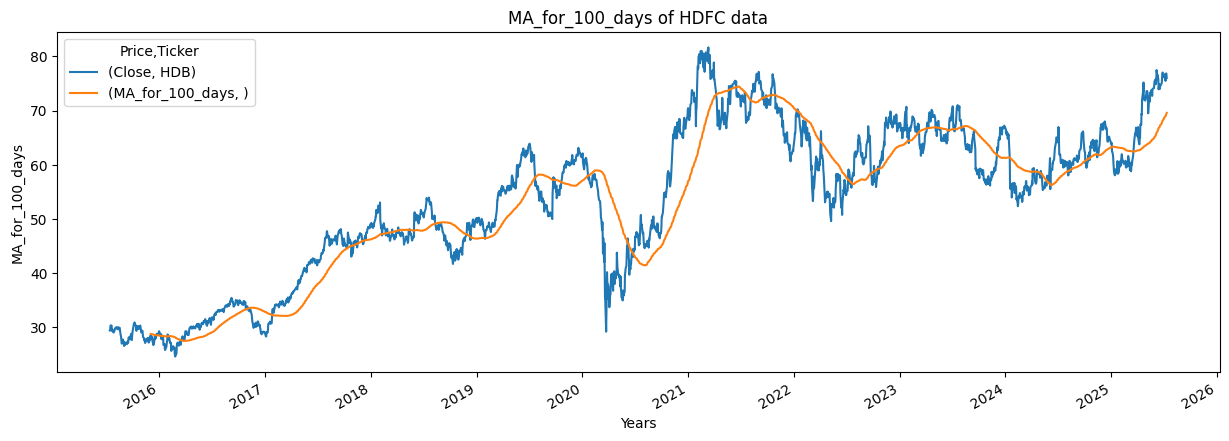

In [23]:
hdfc_data['MA_for_100_days']=hdfc_data['Close'].rolling(100).mean()
plot_graph((15,5),hdfc_data[['Close','MA_for_100_days']],'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

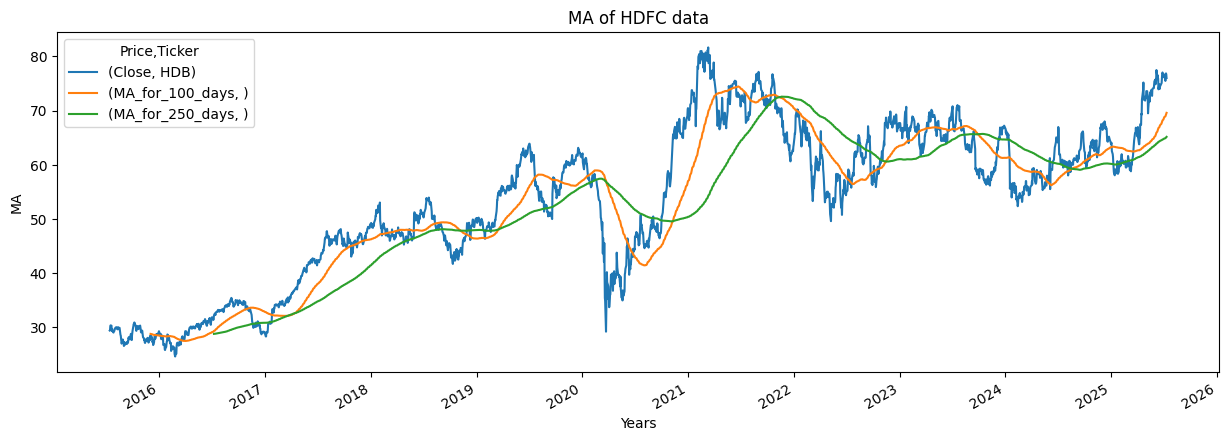

In [24]:
plot_graph((15,5),hdfc_data[['Close','MA_for_100_days','MA_for_250_days']],'MA')

In [25]:
hdfc_data['percentage_change_cp']=hdfc_data['Close'].pct_change()
hdfc_data[['Close','percentage_change_cp']].head()

Price,Close,percentage_change_cp
Ticker,HDB,
Date,,
2015-07-14,29.419878,NaN
2015-07-15,29.476950,0.001940
2015-07-16,30.271181,0.026944
2015-07-17,30.375809,0.003456
2015-07-20,30.313982,-0.002035


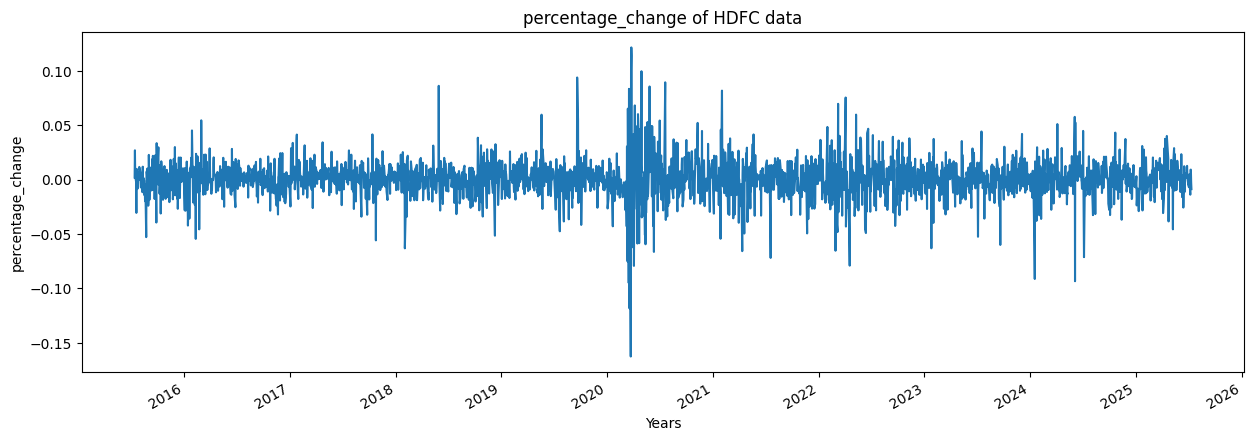

In [26]:
plot_graph((15,5),hdfc_data['percentage_change_cp'], 'percentage_change')

In [27]:
Close_price=hdfc_data[['Close']]

In [28]:
max(Close_price.values),min(Close_price.values)

(array([81.65484619]), array([24.62594795]))

In [ ]:
print("x_test columns:", x_test.columns)
print(x_test.head())

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(Close_price)
scaled_data

array([[0.08406142],
       [0.08506217],
       [0.09898899],
       ...,
       [0.91609792],
       [0.91276623],
       [0.90101783]])

In [30]:
len(scaled_data)

2514

In [31]:
x_data=[]
y_data=[]

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data=np.array(x_data), np.array(y_data)

In [32]:
x_data[0],y_data[0]

(array([[0.08406142],
        [0.08506217],
        [0.09898899],
        [0.10082363],
        [0.0997395 ],
        [0.08347763],
        [0.08856469],
        [0.08564586],
        [0.08114258],
        [0.07747323],
        [0.080809  ],
        [0.08164299],
        [0.08314401],
        [0.08914845],
        [0.09331821],
        [0.09306797],
        [0.09406869],
        [0.09023258],
        [0.09348493],
        [0.09381855],
        [0.08773077],
        [0.09390193],
        [0.09223404],
        [0.09315132],
        [0.09265097],
        [0.08514551],
        [0.08030865],
        [0.07013453],
        [0.06804968],
        [0.04161368],
        [0.04511627],
        [0.04861886],
        [0.05020334],
        [0.05512361],
        [0.04344846],
        [0.03410825],
        [0.04469928],
        [0.04645057],
        [0.0375274 ],
        [0.04269788],
        [0.04253105],
        [0.04494948],
        [0.040196  ],
        [0.04911921],
        [0.04453252],
        [0

In [33]:
int(len(x_data)*0.7)

1689

In [34]:
int(len(y_data)*0.3)

724

In [35]:
splitting_len=int(len(x_data)*0.7)
x_train=x_data[:splitting_len]
y_train=y_data[:splitting_len]

x_test=x_data[splitting_len:]
y_test=y_data[splitting_len:]

In [36]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1689, 100, 1)
(1689, 1)
(725, 100, 1)
(725, 1)


In [37]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [38]:
model=Sequential()
model.add(LSTM(128,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


d:\Stock_price_prediction_2\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [40]:
model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
1689/1689 ━━━━━━━━━━━━━━━━━━━━ 98s 54ms/step - loss: 0.0056
Epoch 2/2
1689/1689 ━━━━━━━━━━━━━━━━━━━━ 70s 41ms/step - loss: 9.4451e-04


In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [42]:
predictions=model.predict(x_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step


In [43]:
predictions

array([[0.65288895],
       [0.6372098 ],
       [0.6208674 ],
       [0.6170643 ],
       [0.6263489 ],
       [0.6319822 ],
       [0.61473465],
       [0.6011089 ],
       [0.6034923 ],
       [0.6044232 ],
       [0.6124971 ],
       [0.61873615],
       [0.61989415],
       [0.6328804 ],
       [0.6509992 ],
       [0.65790963],
       [0.6664755 ],
       [0.6679353 ],
       [0.6950064 ],
       [0.69827867],
       [0.6718925 ],
       [0.6701993 ],
       [0.6667773 ],
       [0.64979935],
       [0.6135135 ],
       [0.57633394],
       [0.5594069 ],
       [0.54495627],
       [0.5483213 ],
       [0.54596853],
       [0.56070787],
       [0.5677864 ],
       [0.5898617 ],
       [0.59324706],
       [0.5836802 ],
       [0.55573153],
       [0.5430333 ],
       [0.52980095],
       [0.5301361 ],
       [0.5420032 ],
       [0.552802  ],
       [0.5773257 ],
       [0.5917811 ],
       [0.5878881 ],
       [0.5732681 ],
       [0.5777034 ],
       [0.5857426 ],
       [0.596

In [44]:
inv_predcitions=scaler.inverse_transform(predictions)
inv_predcitions

array([[61.85948 ],
       [60.96532 ],
       [60.033333],
       [59.816444],
       [60.345932],
       [60.6672  ],
       [59.68359 ],
       [58.90653 ],
       [59.042446],
       [59.095535],
       [59.555984],
       [59.91179 ],
       [59.97783 ],
       [60.71842 ],
       [61.751717],
       [62.14581 ],
       [62.634308],
       [62.71756 ],
       [64.2614  ],
       [64.44801 ],
       [62.94324 ],
       [62.846676],
       [62.65152 ],
       [61.68329 ],
       [59.613945],
       [57.493633],
       [56.528305],
       [55.704205],
       [55.89611 ],
       [55.761932],
       [56.6025  ],
       [57.00618 ],
       [58.265106],
       [58.458176],
       [57.912586],
       [56.318707],
       [55.59454 ],
       [54.839912],
       [54.859028],
       [55.535793],
       [56.151638],
       [57.550198],
       [58.37457 ],
       [58.15256 ],
       [57.318794],
       [57.571735],
       [58.030205],
       [58.659714],
       [59.133533],
       [58.928913],


In [45]:
inv_y_test=scaler.inverse_transform(y_test)
inv_y_test

array([[62.39536285],
       [61.48491669],
       [61.55418777],
       [62.19743729],
       [62.09847641],
       [60.36664581],
       [60.06976318],
       [60.70311737],
       [60.41612625],
       [61.12865448],
       [61.33647156],
       [61.31667709],
       [62.6229744 ],
       [63.73134613],
       [63.78082275],
       [64.62200165],
       [64.5725174 ],
       [67.1158371 ],
       [66.25486755],
       [64.24594116],
       [65.38400269],
       [64.70116425],
       [63.17715836],
       [60.48540115],
       [58.35772705],
       [57.83322525],
       [56.467556  ],
       [57.04153442],
       [56.25973511],
       [57.8134346 ],
       [57.72437286],
       [59.80256653],
       [59.27806854],
       [58.77336121],
       [56.853508  ],
       [57.00194931],
       [55.88368225],
       [56.27952576],
       [57.05142975],
       [57.36810684],
       [59.31764984],
       [59.6541214 ],
       [59.09993744],
       [58.32803345],
       [59.52547455],
       [59

In [46]:
rmse=np.sqrt(np.mean( (inv_predcitions-inv_y_test)**2))
rmse

np.float64(2.0662375315071744)

In [47]:
ploting_data=pd.DataFrame(
    {
    'original_test_data':inv_y_test.reshape(-1),
     'predictions':inv_predcitions.reshape(-1)
    },
        index=hdfc_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2022-08-19,62.395363,61.859482
2022-08-22,61.484917,60.965321
2022-08-23,61.554188,60.033333
2022-08-24,62.197437,59.816444
2022-08-25,62.098476,60.345932


<Figure size 640x480 with 0 Axes>

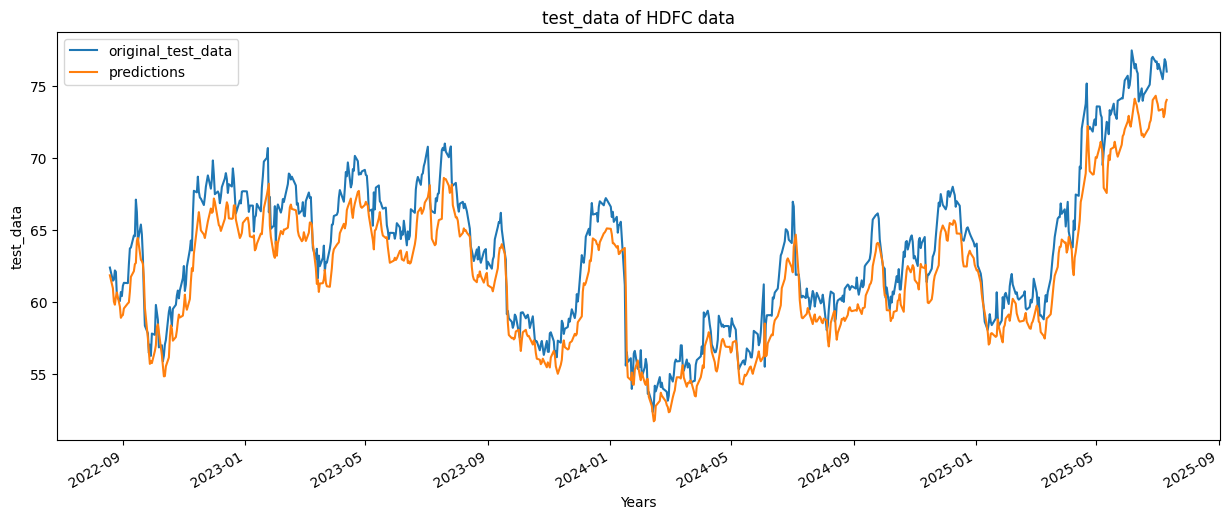

In [48]:
plot_graph((15,6),ploting_data,'test_data')

<Figure size 640x480 with 0 Axes>

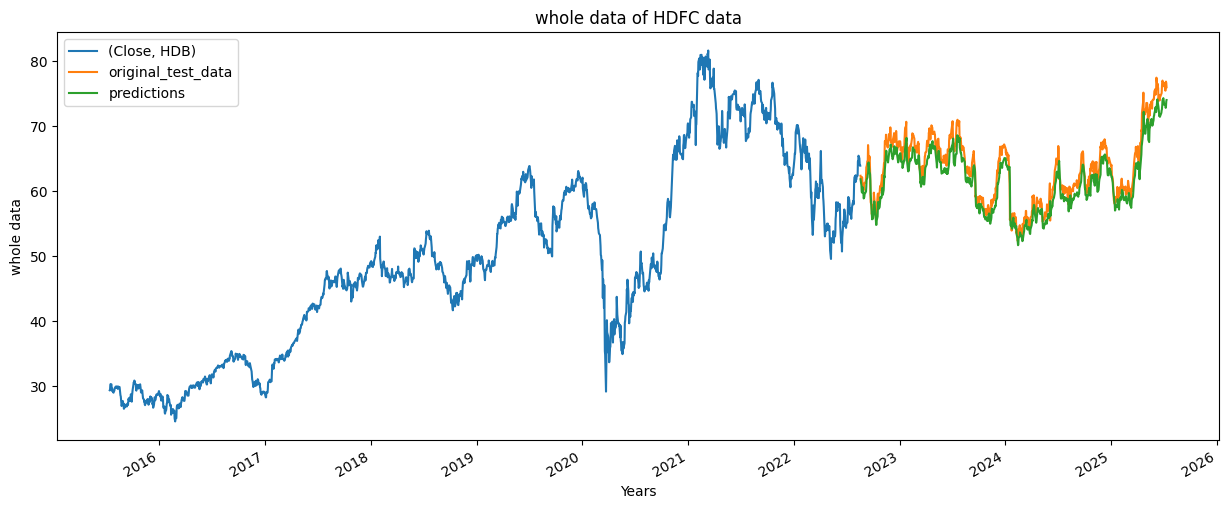

In [49]:
plot_graph((15,6), pd.concat([Close_price[:splitting_len+100],ploting_data], axis=0),'whole data')

In [50]:
model.save('Latest_stock_price_model.keras')